### **Visualização do dataset**

In [1]:
import sys
sys.path.append('/home/guilherme/AIEnvironment/SentimentAnalysis/src/data_preparation')
sys.path.append('/home/guilherme/AIEnvironment/SentimentAnalysis/src/feature_engineering')
from data_exploration import load_data, read_text
from feature_engineering import positive_words_cloud, negative_words_cloud, plot_word_frequencies
from feature_engineering import normalize_corpus, remove_stop_words, remove_punctuation, stemm_corpus
import nltk
from nltk import tokenize
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/guilherme/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### **Carregando a base de dados e visualizando a primeira avaliação**

In [2]:
df = load_data("/home/guilherme/AIEnvironment/SentimentAnalysis/data/processed/df_imdb.csv")
text = df['Reviews'][0]
first_text = read_text(text)
for text in first_text:
    print(text)

Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from t
he terrific sea rescue sequences, of which there are very few I just did not care about an
y of the characters. Most of us have ghosts in the closet, and Costners character are real
ized early on, and then forgotten until much later, by which time I did not care. The char
acter we should really care about is a very cocky, overconfident Ashton Kutcher. The probl
em is he comes off as kid who thinks hes better than anyone else around him and shows no s
igns of a cluttered closet. His only obstacle appears to be winning over Costner. Finally 
when we are well past the half way point of this stinker, Costner tells us all about Kutch
ers ghosts. We are told why Kutcher is driven to be the best with no prior inkling or fore
shadowing. No magic here, it was all I could do to keep from turning it off an hour in.


#### Resposta: 
- Como pode-se perceber, são apenas textos, a avaliação inclusive mostra uma crítica negativa. Para que algoritmos de Machine Learning apropriados possam ser aplicados, é preciso tratar os textos de forma numérica.

### **Pré-processamento: Aplicando técnicas de NLP (Natural Language Processing)**

#### **Bag of Words**

- Abordagem que consiste em realizar uma contagem de palavras, ou seja, transformar o texto em um vetor de números. Processo de extração de características de texto para que uma forma estruturada possa ser utilizada para algoritmos de Machine Learning.

Obs: A técnica Bag of Words não leva em consideração a ordem das palavras, apenas a frequência com que aparecem, não sendo apropriada para textos longos, também não realiza nenhum tratamento nos textos. 


### **WordCloud - Visualização de palavras mais frequentes**

- Visualização das palavras mais frequentes em forma de nuvem de palavras, inicialmente sem tratamento dos textos.

#### Visualizando nuvem de avaliações positivas

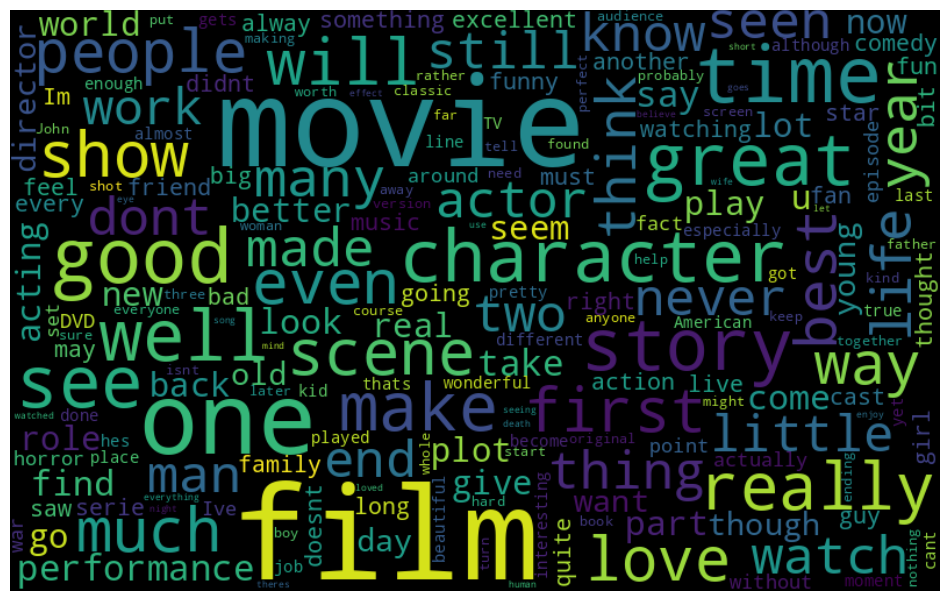

In [3]:
positive_words_cloud(df, 'Reviews')

#### Visualizando nuvem de avaliações negativas

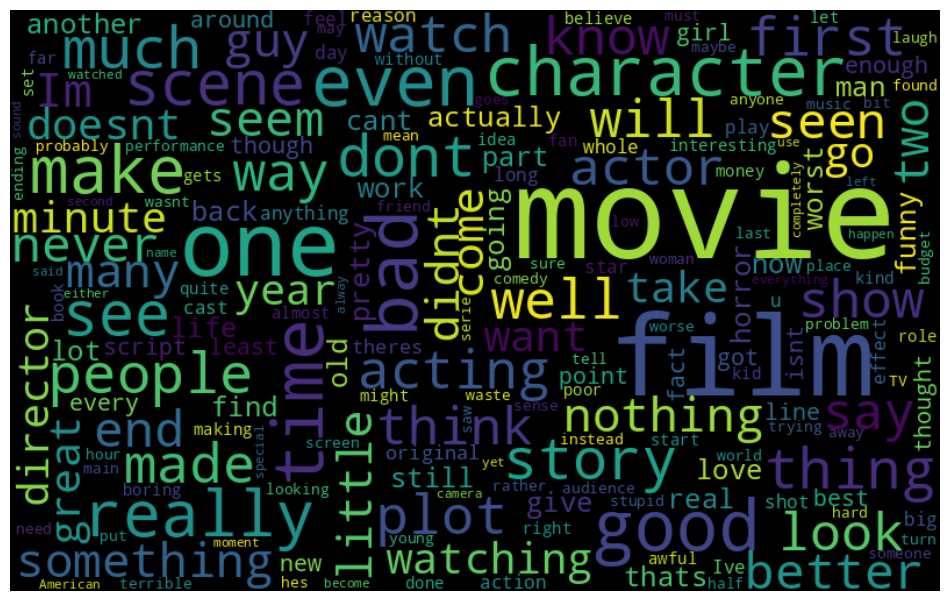

In [4]:
negative_words_cloud(df, 'Reviews')

#### Análise:

- As wordclouds não dizem nada a respeito do sentimento das avaliações, porque há muito ruído nos textos, como por exemplo, verbos, pronomes, preposições, artigos, etc. É Necessário tratar os textos para que as nuvens de palavras possam ser mais informativas.

### **Tokenização**

- Processo de dividir o texto em palavras ou frases menores, que são chamadas de tokens. Existem muitas abordagens para tokenização, para os propósitos deste projeto, a tokenização considerando espaços em branco entre as palavras será suficiente, e a biblioteca *NLTK* será utilizada em conjunto.

#### **Utilização da biblioteca NLTK**

- A biblioteca Natural Language Toolkit (NLTK) é uma biblioteca de processamento de linguagem natural, que fornece ferramentas para trabalhar com textos. Dentre as muitas ferramentas, as que serão implementadas para tratamento das avaliações são:
     1. Remoção de stopwords
     2. Eliminação de pontuações
     3. Normalização do corpus
     4. Stemming do corpus
    



### **Tokenização de todo corpus**

#### Criando WordCloud com todas as palavras do corpus e tokenizando considerando espaços em branco entre as palavras

In [7]:
all_words = ' '.join([text for text in df['Reviews']])
token = tokenize.WhitespaceTokenizer().tokenize(all_words)

#### Visualizando a frequência das palavras mais comuns no corpus

In [12]:

frequency = nltk.FreqDist(token)
df_frequency = pd.DataFrame({'Palavra': list(frequency.keys()), 
                             'Frequência': list(frequency.values())})
df_frequency.nlargest(10, columns='Frequência')

,Palavra,Frequência
16,the,541903
7,a,294097
41,and,290407
21,of,269316
87,to,248555
59,is,194182
39,in,162011
27,I,131434
154,that,120419
99,this,110592


#### Análise:
- Fica claro que as 10 palavras mais frequentes são stopwords, ou seja, palavras que não agregam valor semântico ao texto, como artigos, preposições, pronomes, etc. É necessário removê-las para que as nuvens de palavras sejam mais informativas.

#### **Tratamento 1: Remoção de stopwords**

Utilizando a biblioteca NLTK, será feita a remoção de stopwords do corpus considerando a língua inglesa.

#### Criando uma nova coluna no dataframe com os textos tratados (sem stopwords)

In [3]:
df['Treatment1'] = remove_stop_words(df, 'Reviews')

In [4]:
df.head()

,Reviews,Sentiment,Treatment1
0,Once again Mr. Costner has dragged out a movie...,0,Once Mr. Costner dragged movie far longer nece...
1,This is an example of why the majority of acti...,0,This example majority action films same. Gener...
2,"First of all I hate those moronic rappers, who...",0,"First I hate moronic rappers, couldnt act gun ..."
3,Not even the Beatles could write songs everyon...,0,Not even Beatles could write songs everyone li...
4,Brass pictures movies is not a fitting word fo...,0,Brass pictures movies fitting word really some...


#### Comparadando os textos antes e depois do tratamento da primeira linha

Sem tratamento

In [4]:
text = df['Reviews'][0]
first_text = read_text(text)
for text in first_text:
    print(text)

Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from t
he terrific sea rescue sequences, of which there are very few I just did not care about an
y of the characters. Most of us have ghosts in the closet, and Costners character are real
ized early on, and then forgotten until much later, by which time I did not care. The char
acter we should really care about is a very cocky, overconfident Ashton Kutcher. The probl
em is he comes off as kid who thinks hes better than anyone else around him and shows no s
igns of a cluttered closet. His only obstacle appears to be winning over Costner. Finally 
when we are well past the half way point of this stinker, Costner tells us all about Kutch
ers ghosts. We are told why Kutcher is driven to be the best with no prior inkling or fore
shadowing. No magic here, it was all I could do to keep from turning it off an hour in.


Após remoção de stopwords

In [6]:
text_without_stop_words = df['Treatment1'][0]
first_text = read_text(text_without_stop_words)
for text in first_text:
    print(text)

Once Mr. Costner dragged movie far longer necessary. Aside terrific sea rescue sequences, 
I care characters. Most us ghosts closet, Costners character realized early on, forgotten 
much later, time I care. The character really care cocky, overconfident Ashton Kutcher. Th
e problem comes kid thinks hes better anyone else around shows signs cluttered closet. His
 obstacle appears winning Costner. Finally well past half way point stinker, Costner tells
 us Kutchers ghosts. We told Kutcher driven best prior inkling foreshadowing. No magic her
e, I could keep turning hour in.


#### Análise:

- A remoção de stopwords foi efetiva, pois o texto tratado está mais limpo, sem palavras que não agregam valor semântico.

#### Visualizando as palavras mais frequentes após remoção de stopwords

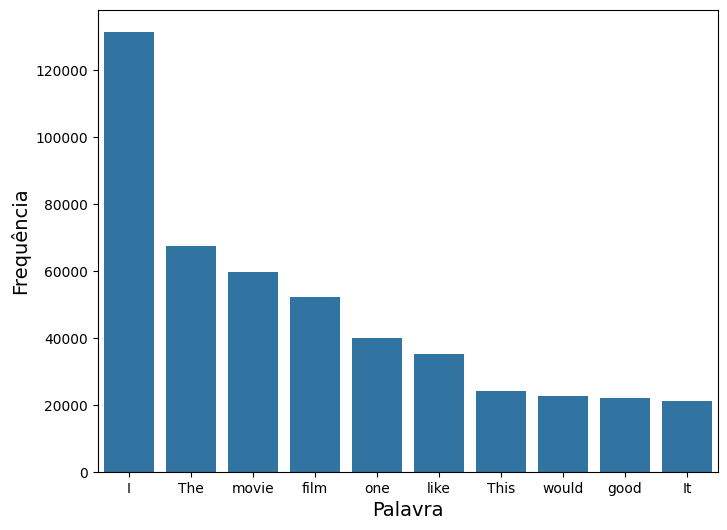

In [7]:
plot_word_frequencies(df, 'Treatment1', 10)

#### Análise:
- As palavras mais frequentes já começam se mostrar mais informativa com a palavra 'good' aparecendo, porém todas as outras palavras podem ser eliminadas, visto que seu valor semântico é nulo. 

#### **Tratamento 2: Eliminação de pontuações**

#### O processo de eliminação de pontuações será feito utilizando a biblioteca *string* do Python. Foi feita uma soma das pontuações com as stopwords para que todas as palavras que não agregam valor semântico sejam eliminadas. O filtro foi aplicado no texto tratado anteriormente.

In [4]:
df['Treatment2'] = remove_punctuation(df, 'Treatment1')

In [5]:
df.head()

,Reviews,Sentiment,Treatment1,Treatment2
0,Once again Mr. Costner has dragged out a movie...,0,Once Mr. Costner dragged movie far longer nece...,Once Mr Costner dragged movie far longer neces...
1,This is an example of why the majority of acti...,0,This example majority action films same. Gener...,This example majority action films Generic bor...
2,"First of all I hate those moronic rappers, who...",0,"First I hate moronic rappers, couldnt act gun ...",First I hate moronic rappers couldnt act gun p...
3,Not even the Beatles could write songs everyon...,0,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...
4,Brass pictures movies is not a fitting word fo...,0,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...


#### Comparando os textos do tratament 1 e do tratamento 2 da primeira linha

Tratamento 1: Remoção de stopwords

In [6]:
text_without_stop_words = df['Treatment1'][0]
first_text = read_text(text_without_stop_words)
for text in first_text:
    print(text)

Once Mr. Costner dragged movie far longer necessary. Aside terrific sea rescue sequences, 
I care characters. Most us ghosts closet, Costners character realized early on, forgotten 
much later, time I care. The character really care cocky, overconfident Ashton Kutcher. Th
e problem comes kid thinks hes better anyone else around shows signs cluttered closet. His
 obstacle appears winning Costner. Finally well past half way point stinker, Costner tells
 us Kutchers ghosts. We told Kutcher driven best prior inkling foreshadowing. No magic her
e, I could keep turning hour in.


Tratamento 2: Eliminação de pontuações

In [7]:
text_without_punctuation = df['Treatment2'][0]
first_text = read_text(text_without_punctuation)
for text in first_text:
    print(text)

Once Mr Costner dragged movie far longer necessary Aside terrific sea rescue sequences I c
are characters Most us ghosts closet Costners character realized early forgotten much late
r time I care The character really care cocky overconfident Ashton Kutcher The problem com
es kid thinks hes better anyone else around shows signs cluttered closet His obstacle appe
ars winning Costner Finally well past half way point stinker Costner tells us Kutchers gho
sts We told Kutcher driven best prior inkling foreshadowing No magic I could keep turning 
hour


#### Análise
- A eliminação de pontuações foi efetiva, pois o texto tratado está mais limpo, porém não houve uma grande diferença entre os textos tratados 1 e 2, pois as mesmas palavras sem valor semântico permanecem.

####    **Tratamento 3: Normalização do corpus**

In [5]:
df['Treatment3'] = normalize_corpus(df, 'Treatment2')

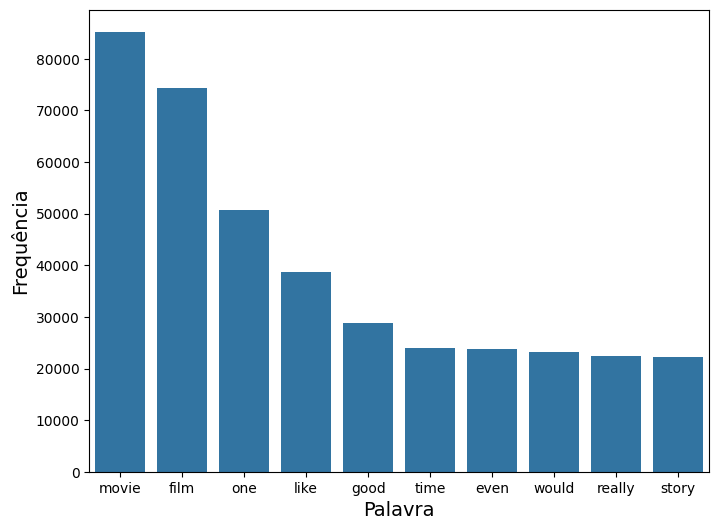

In [8]:
plot_word_frequencies(df, 'Treatment3', 10)

#### Análise

- A normalização permitiu remover mais stopwords, e já possível perceber palavras mais relevantes para análise.

#### Visualizando WordCloud após tratamento 3

WordCloud de avaliações positivas

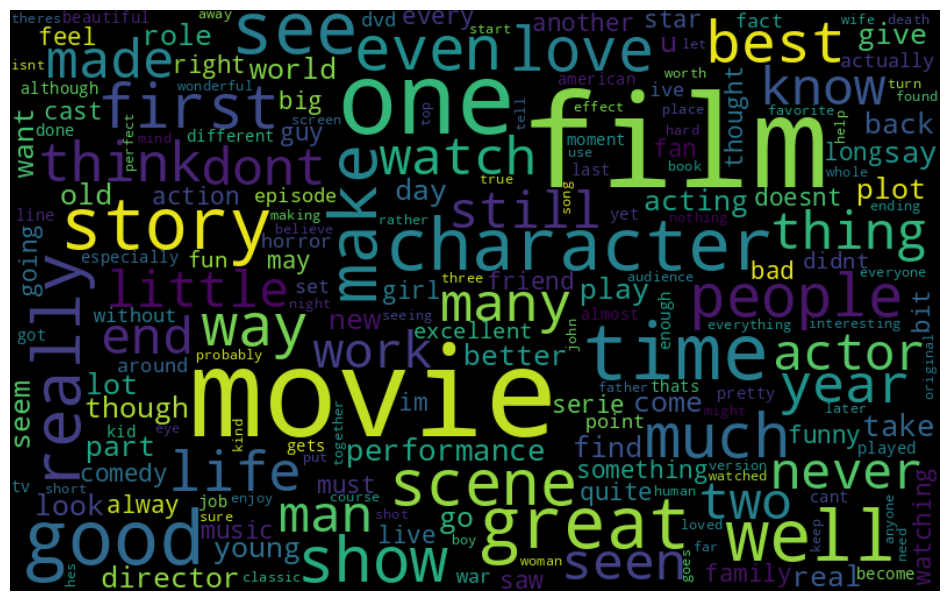

In [6]:
positive_words_cloud(df, 'Treatment3')

WordCloud de avaliações negativas

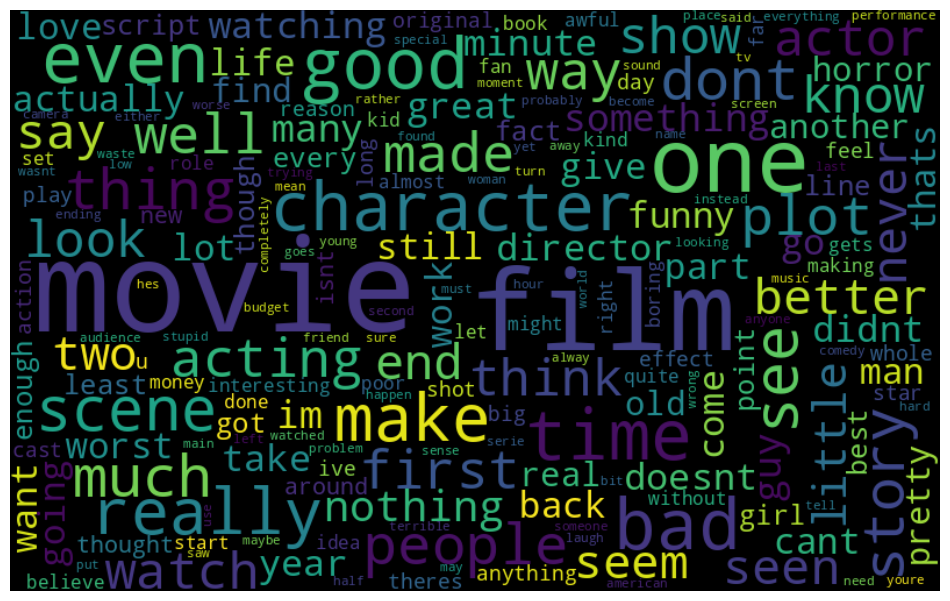

In [7]:
negative_words_cloud(df, 'Treatment3')

#### Análise

- Já é possível visualizar palavras coerentes com o sentimento nas duas nuvens, em especial na nuvem positiva, onde palavras como 'good', 'great', 'love', 'best' aparecem com destaque. Porém, ainda há palavras que não agregam valor semântico, como 'movie', 'film', 'one', 'like', etc. 
-  A nuvem negativa ainda não está tão informativa, pois carrega palavras com valor positivo também. 

#### **Tratamento 4: Stemming do corpus**

- O processo de stemming consiste em reduzir as palavras à sua forma raiz, ou seja, reduzir as palavras flexionadas à sua forma base. A biblioteca *NLTK* será utilizada para realizar o stemming do corpus.

In [6]:
df['Treatment4'] = stemm_corpus(df, 'Treatment3')

In [7]:
df.head()

,Reviews,Sentiment,Treatment1,Treatment2,Treatment3,Treatment4
0,Once again Mr. Costner has dragged out a movie...,0,Once Mr. Costner dragged movie far longer nece...,Once Mr Costner dragged movie far longer neces...,mr costner dragged movie far longer necessary ...,mr costner drag movi far longer necessari asid...
1,This is an example of why the majority of acti...,0,This example majority action films same. Gener...,This example majority action films Generic bor...,example majority action films generic boring t...,exampl major action film gener bore there real...
2,"First of all I hate those moronic rappers, who...",0,"First I hate moronic rappers, couldnt act gun ...",First I hate moronic rappers couldnt act gun p...,first hate moronic rappers couldnt act gun pre...,first hate moron rapper couldnt act gun press ...
3,Not even the Beatles could write songs everyon...,0,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...,even beatles could write songs everyone liked ...,even beatl could write song everyon like altho...
4,Brass pictures movies is not a fitting word fo...,0,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...,brass pictures movies fitting word really some...,brass pictur movi fit word realli somewhat bra...
